# wigglesphere scratch

> experimentin with them wigglespheres

In [ ]:
import bezier
from datetime import datetime
from matplotlib.collections import LineCollection
from matplotlib import pyplot as plt
import numpy as np
from penkit import write, preview
from pathlib import Path
import seaborn as sns
from tqdm import tqdm

today = datetime.today().strftime('%Y%m%d')
import good_robot.wigglesphere as ws
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# chord array testing

(-1.0999300321662784,
 1.0999970341556737,
 -1.0999691605850996,
 1.0999579057368525)

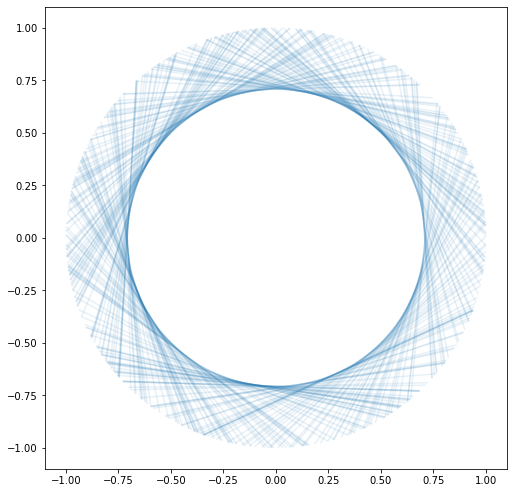

In [ ]:
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)

ca = ws.ChordArray(center = np.array([0, 0]), radius=1)
ca.add_random_chords_at_set_theta_diff(n_chords=300, theta_diff= np.pi * 0.5)
lines = ws.layer_to_lines(ca.chords)
lc = LineCollection(lines, alpha=0.1)
layers.append(ca.chords.T)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')
# ax.set_xlim((0, 11))
# ax.set_ylim((0, 8.5))

# chord array grids

In [ ]:
x_centers = np.linspace(2.5, 8.5, 3)
y_centers = np.linspace(2.5, 6, 2)
xcs, ycs = np.meshgrid(x_centers, y_centers)
xcs = xcs.ravel()
ycs = ycs.ravel()
n_grams = len(xcs)
theta_diffs = np.linspace(np.pi *0.5, np.pi * 1.5, n_grams)

(0.0, 8.5)

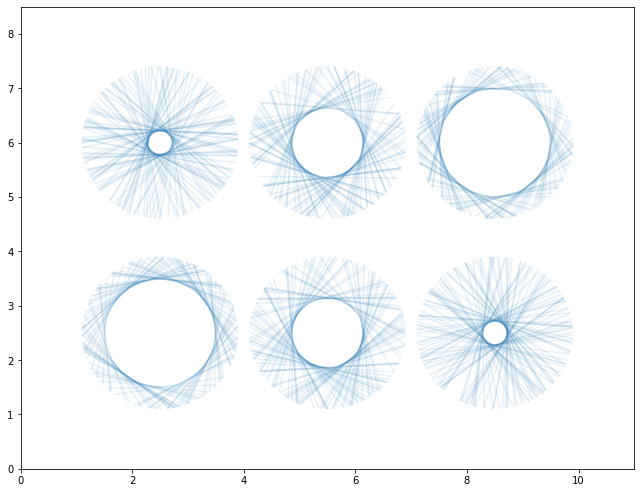

In [ ]:
layers = []
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
for xc, yc, theta_diff in zip(xcs, ycs, theta_diffs):
    ca = ws.ChordArray(center = np.array([xc, yc]), radius=1.4)
    ca.add_random_chords_at_set_theta_diff(n_chords=100, theta_diff= theta_diff)
    lines = ws.layer_to_lines(ca.chords)
    layers.append(ca.chords.T)
    lc = LineCollection(lines, alpha=0.1)
    ax.add_collection(lc)


ax.set_xlim((0, 11))
ax.set_ylim((0, 8.5))


In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0001_chord_array.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath)